In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time

df_hs_ls = np.loadtxt("/Users/boris/halosky_sims_tllp/hmpdf_sim_yy_NG_cov_ells_coarse_08Mar24.txt")
df_hs = np.loadtxt("/Users/boris/halosky_sims_tllp/hmpdf_sim_yy_PS_coarse_08Mar24.txt")

2024-03-09 15:53:21.280744: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-09 15:53:21.280765: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-09 15:53:21.280770: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-09 15:53:21.280829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-09 15:53:21.281094: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
df_hs_ls

array([ 125.,  325.,  525.,  725.,  925., 1125., 1325., 1525., 1725.,
       1925., 2125., 2325., 2525., 2725., 2925., 3125., 3325., 3525.,
       3725., 3925., 4125., 4325., 4525., 4725., 4925., 5125., 5325.,
       5525., 5725., 5925., 6125., 6325., 6525., 6725., 6925., 7125.,
       7325., 7525., 7725., 7925., 8125., 8325., 8525., 8725., 8925.,
       9125., 9325., 9525., 9725.])

In [3]:
df_hs_ls[1:]-df_hs_ls[:-1]

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200.])

In [4]:
# df_hs

In [5]:
%%time
h = 0.674
omega_b = 0.0224
Omega_m=0.315
sigma8=0.811
N_ur = 3.046
n_s = 0.965
tau_reio=0.054
N_ncdm=0
m_ncdm=0

Mclass_sz = Class()

Mclass_sz.set({

'h': h,
'sigma8': sigma8,
'n_s': n_s,
'tau_reio': tau_reio,
'omega_b': omega_b,
'omega_cdm':  0.1207,#Omega_m*h**2-omega_b,  
'N_ur': 3.046,


'output': 'tSZ_1h,tSZ_Trispectrum',

'pressure profile':'B12',
'delta for electron pressure':'200c',
"concentration parameter":"D08",
"ell_min" : 125,
"ell_max" : 9725,
'dell': 200,
'dlogell': 0.,
    
'M_min' : 1e11*h, 
'M_max' : 1e16*h,

'z_min': 0.005,
'z_max': 6.,
    
    
'n_z_pressure_profile': 500,
'n_m_pressure_profile' : 500,
'n_l_pressure_profile' : 500,
    
'l_min_gas_pressure_profile' :  1.e-2,
'l_max_gas_pressure_profile' :  5.e4,    

'pressure_profile_epsrel':1e-4,
'pressure_profile_epsabs':1e-100,
    

    
    
'hm_consistency' : 0,
    

'use_fft_for_profiles_transform' : 1,
'x_min_gas_pressure_fftw' : 1e-5,
'x_max_gas_pressure_fftw' : 1e5,
'N_samp_fftw' : 8192,
    
    
# 'ndim_masses' : 500,
# 'ndim_redshifts' :100,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,    
    

'truncate_gas_pressure_wrt_rvir' : 1,
'x_outSZ': 2.,
'mass function' : 'T10',
'T10_alpha_fixed' : 1,
    
    
'P_k_max_h/Mpc': 10.,
'k_per_decade_class_sz':80.,
'k_min_for_pk_class_sz':1e-4,
'k_max_for_pk_class_sz': 10*h, 

})
Mclass_sz.compute()

CPU times: user 11min 40s, sys: 4.54 s, total: 11min 45s
Wall time: 1min 21s


In [6]:
%%time
# fsky = 0.64
dell = 1.
l = np.asarray(Mclass_sz.cl_sz()['ell'])
tllprime_sz = Mclass_sz.tllprime_sz().copy() # note: sqrt(T_ll') ~ 10^12 y^2 ~ C_l 
# tllprime_sz = tllprime_szd
# for il in range(len(l)):
#     for ilp in range(il+1):
#         tllprime_sz[ilp][il] = tllprime_sz[il][ilp]

norm_tllp = np.zeros((len(l),len(l)))
mllp = np.zeros((len(l),len(l)))
tllp = np.zeros((len(l),len(l)))
for il in range(len(l)):
    for ilp in range(len(l)):
        # ilp = il
        lil =l[il]
        lilp = l[ilp]
        # sig_gauss_l = np.sqrt(2./(2*lil+1.))*cl_yy_1h[il]/np.sqrt(dell*fsky)  # cl_yy is dl_yy here; this is binned 
        # sig_gauss_lp = np.sqrt(2./(2*lilp+1.))*cl_yy_1h[ilp]/np.sqrt(dell*fsky)  # cl_yy is dl_yy here; this is binned
        # norm_tllp[il][ilp] = np.sqrt(lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi)*np.sqrt(tllprime_sz[il][ilp]/4./np.pi/fsky)/np.sqrt(sig_gauss_l*sig_gauss_lp)
        # if il == ilp:
        #     mllp[il][ilp] = (sig_gauss_l*sig_gauss_l+lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi*tllprime_sz[il][ilp]/4./np.pi/fsky)*1e-24
        # else:
        #     mllp[il][ilp] = lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi*tllprime_sz[il][ilp]/4./np.pi/fsky*1e-24
        tllp[il][ilp] = lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi*tllprime_sz[il][ilp]*1e-24

CPU times: user 3.69 ms, sys: 1.99 ms, total: 5.68 ms
Wall time: 4.41 ms


In [7]:
l,l-df_hs_ls

(array([ 125.,  325.,  525.,  725.,  925., 1125., 1325., 1525., 1725.,
        1925., 2125., 2325., 2525., 2725., 2925., 3125., 3325., 3525.,
        3725., 3925., 4125., 4325., 4525., 4725., 4925., 5125., 5325.,
        5525., 5725., 5925., 6125., 6325., 6525., 6725., 6925., 7125.,
        7325., 7525., 7725., 7925., 8125., 8325., 8525., 8725., 8925.,
        9125., 9325., 9525., 9725.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [8]:
l,Mclass_sz.tllprime_sz(),tllp

(array([ 125.,  325.,  525.,  725.,  925., 1125., 1325., 1525., 1725.,
        1925., 2125., 2325., 2525., 2725., 2925., 3125., 3325., 3525.,
        3725., 3925., 4125., 4325., 4525., 4725., 4925., 5125., 5325.,
        5525., 5725., 5925., 6125., 6325., 6525., 6725., 6925., 7125.,
        7325., 7525., 7725., 7925., 8125., 8325., 8525., 8725., 8925.,
        9125., 9325., 9525., 9725.]),
 array([[2.86478247e-09, 1.85023191e-10, 3.53277335e-11, ...,
         7.52174193e-17, 6.71339524e-17, 5.99662577e-17],
        [1.85023191e-10, 2.51735449e-11, 6.93559122e-12, ...,
         5.45839872e-17, 4.88470455e-17, 4.37454506e-17],
        [3.53277335e-11, 6.93559122e-12, 2.31784798e-12, ...,
         4.11613879e-17, 3.69230985e-17, 3.31445664e-17],
        ...,
        [7.52174193e-17, 5.45839872e-17, 4.11613879e-17, ...,
         1.33875688e-19, 1.23612583e-19, 1.14190757e-19],
        [6.71339524e-17, 4.88470455e-17, 3.69230985e-17, ...,
         1.23612583e-19, 1.14166445e-19, 1.05492569e

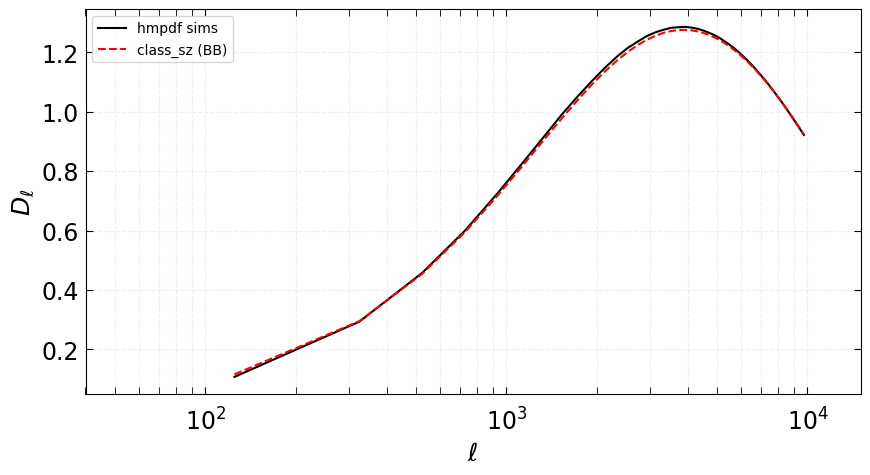

In [9]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xscale('log')

df_hs_ls = np.loadtxt("/Users/boris/halosky_sims_tllp/hmpdf_sim_yy_NG_cov_ells_coarse_08Mar24.txt")
df_hs = np.loadtxt("/Users/boris/halosky_sims_tllp/hmpdf_sim_yy_PS_coarse_08Mar24.txt")
ax.plot(df_hs_ls,df_hs,label='hmpdf sims',c='k')

l = np.asarray(Mclass_sz.cl_sz()['ell'])
dl_yy_1h = np.asarray(Mclass_sz.cl_sz()['1h'])
ax.plot(l,dl_yy_1h,label='class_sz (BB)',c='r',ls='--')

# alina = np.load("/Users/boris/halosky_sims_tllp/cl_class_sz.npy", allow_pickle=True).flatten()[0]
# ax.plot(alina['ell'],alina['1h'],label='class_sz (AS)',c='g',ls='-.')

plt.xlim(40,1.5e4)
ax.legend()

In [10]:
!ls /Users/boris/halosky_sims_tllp/

cl_class_sz.npy
hmpdf_sim_yy_NG_cov_23Feb24.npy
hmpdf_sim_yy_NG_cov_23Feb24.txt
hmpdf_sim_yy_NG_cov_coarse_08Mar24.npy
hmpdf_sim_yy_NG_cov_ells_23Feb24.npy
hmpdf_sim_yy_NG_cov_ells_23Feb24.txt
hmpdf_sim_yy_NG_cov_ells_coarse_08Mar24.txt
hmpdf_sim_yy_PS_23Feb24.npy
hmpdf_sim_yy_PS_23Feb24.txt
hmpdf_sim_yy_PS_coarse_08Mar24.txt


In [11]:
imin , imax = np.where(df_hs_ls==125)[0][0],np.where(df_hs_ls==9725.)[0][0]

In [12]:
df_hs_ls[imin],df_hs_ls[imax]

(125.0, 9725.0)

In [13]:
imin , imax

(0, 48)

In [14]:
tllp_dl_hs = np.load("/Users/boris/halosky_sims_tllp/hmpdf_sim_yy_NG_cov_coarse_08Mar24.npy")

In [16]:
import pandas as pd
df_tllp_hs = pd.DataFrame(tllp_dl_hs)

In [17]:
subset_tllp_hs = df_tllp_hs.iloc[imin:(imax+1),imin:(imax+1)]*1e-24

In [18]:
np.shape(tllp)

(49, 49)

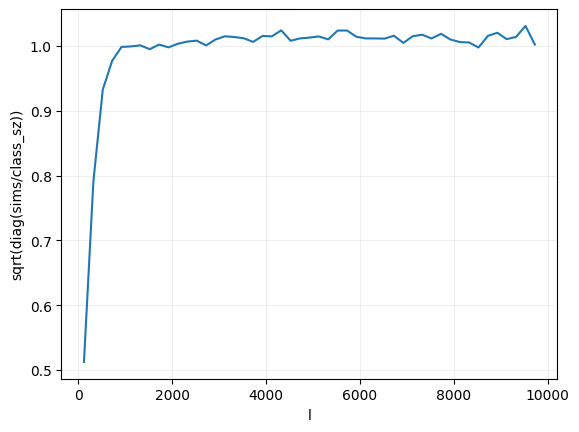

In [19]:
plt.plot(df_hs_ls[imin:(imax+1)],np.sqrt(np.diag(subset_tllp_hs)/np.diag(tllp)))
plt.ylabel("sqrt(diag(sims/class_sz))")
plt.xlabel("l")
plt.grid(which='both',alpha=0.2)

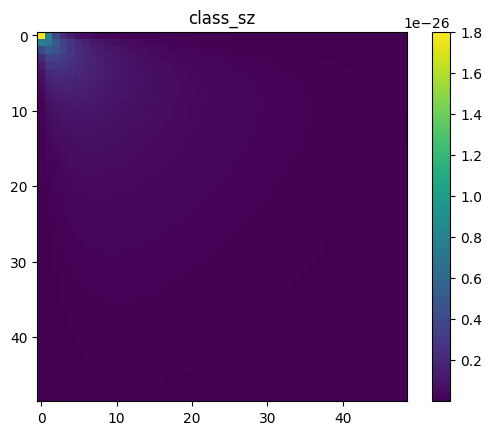

In [20]:
plt.imshow(tllp)
plt.title("class_sz")
plt.colorbar()

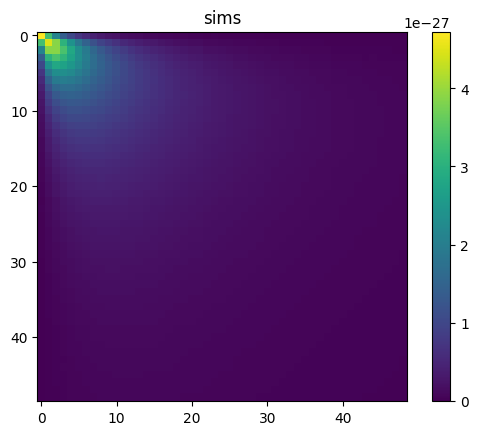

In [21]:
plt.imshow(subset_tllp_hs.values)
plt.title("sims")
plt.colorbar()

In [22]:
ratio_sim_analyt = subset_tllp_hs.values/tllp

Text(0, 0.5, 'normalized counts')

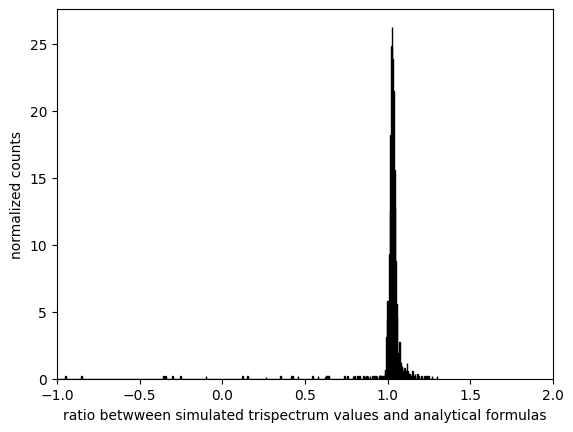

In [60]:
_ = plt.hist(ratio_sim_analyt.flatten(), bins=1000, color='blue', edgecolor='black',density=True)
plt.xlim(-1,2)
plt.xlabel("ratio betwween simulated trispectrum values and analytical formulas")
plt.ylabel("normalized counts")

In [25]:
corr_sims = np.zeros(np.shape( subset_tllp_hs.values))
simsdiag = np.sqrt(np.diag( subset_tllp_hs.values))

for il in range(np.shape( subset_tllp_hs.values)[0]):
    for ilp in range(np.shape( subset_tllp_hs.values)[0]):
        corr_sims[il][ilp] =  subset_tllp_hs.values[il][ilp]/simsdiag[il]/simsdiag[ilp]

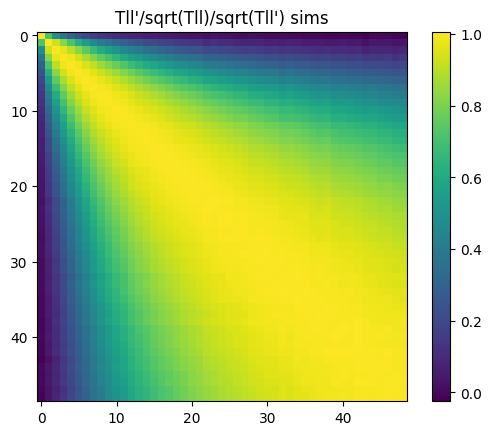

In [26]:
plt.imshow(corr_sims)
plt.title("Tll'/sqrt(Tll)/sqrt(Tll') sims")
plt.colorbar()

In [27]:
corr_tllp = np.zeros(np.shape(tllp))
class_szdiag = np.sqrt(np.diag( tllp))

for il in range(np.shape( tllp)[0]):
    for ilp in range(np.shape( tllp)[0]):
        corr_tllp[il][ilp] =  tllp[il][ilp]/class_szdiag[il]/class_szdiag[ilp]

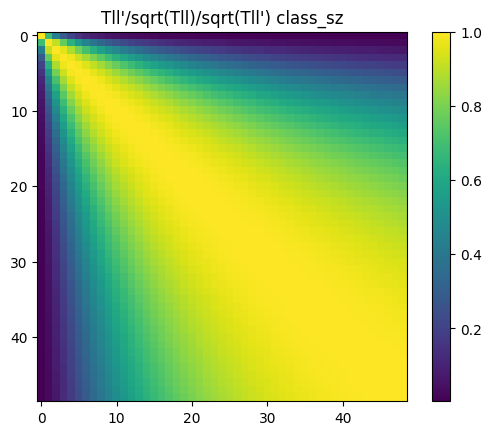

In [28]:
plt.imshow(corr_tllp)
plt.title("Tll'/sqrt(Tll)/sqrt(Tll') class_sz")
plt.colorbar()

### Komatsu & Seljak plot

In [29]:
np.shape(tllp),np.shape(dl_yy_1h),np.shape(l)

((49, 49), (49,), (49,))

In [30]:
lfac = np.sqrt(2.*l+1)/dl_yy_1h
lfac

array([136.3077813 ,  86.38111085,  71.36999623,  64.25301625,
        60.38137942,  58.20240255,  57.03702537,  56.53847365,
        56.5072157 ,  56.82166592,  57.40682239,  58.20626791,
        59.18199876,  60.31648186,  61.57880675,  62.95760626,
        64.44153265,  66.02826907,  67.70637405,  69.46037854,
        71.30047097,  73.22000832,  75.21060154,  77.27476301,
        79.41877953,  81.61579185,  83.8875401 ,  86.23180594,
        88.64558439,  91.12686442,  93.66407909,  96.26941205,
        98.94260237, 101.68398594, 104.4929661 , 107.36687638,
       110.29784798, 113.29584494, 116.3635278 , 119.50278211,
       122.71860994, 126.01560718, 129.34043439, 132.74550432,
       136.23768764, 139.81692281, 143.41381473, 147.10998221,
       150.91320367])

In [31]:
Mllp = tllp*1e24*np.outer(lfac,lfac)/8./np.pi

In [32]:
Mllp

array([[1.33074385e+01, 3.66393299e+00, 1.50653112e+00, ...,
        2.02980949e-03, 1.93892733e-03, 1.85207970e-03],
       [3.66393299e+00, 2.12512398e+00, 1.26085272e+00, ...,
        6.27943610e-03, 6.01417630e-03, 5.75975696e-03],
       [1.50653112e+00, 1.26085272e+00, 9.07416758e-01, ...,
        1.01973277e-02, 9.78987097e-03, 9.39776500e-03],
       ...,
       [2.02980949e-03, 6.27943610e-03, 1.01973277e-02, ...,
        2.09880746e-02, 2.07403476e-02, 2.04888560e-02],
       [1.93892733e-03, 6.01417630e-03, 9.78987097e-03, ...,
        2.07403476e-02, 2.05009644e-02, 2.02577445e-02],
       [1.85207970e-03, 5.75975696e-03, 9.39776500e-03, ...,
        2.04888560e-02, 2.02577445e-02, 2.00227249e-02]])

In [33]:
l

array([ 125.,  325.,  525.,  725.,  925., 1125., 1325., 1525., 1725.,
       1925., 2125., 2325., 2525., 2725., 2925., 3125., 3325., 3525.,
       3725., 3925., 4125., 4325., 4525., 4725., 4925., 5125., 5325.,
       5525., 5725., 5925., 6125., 6325., 6525., 6725., 6925., 7125.,
       7325., 7525., 7725., 7925., 8125., 8325., 8525., 8725., 8925.,
       9125., 9325., 9525., 9725.])

In [34]:
l[5],l[10],l[15]

(1125.0, 2125.0, 3125.0)

Text(0.5, 1.0, 'class_sz')

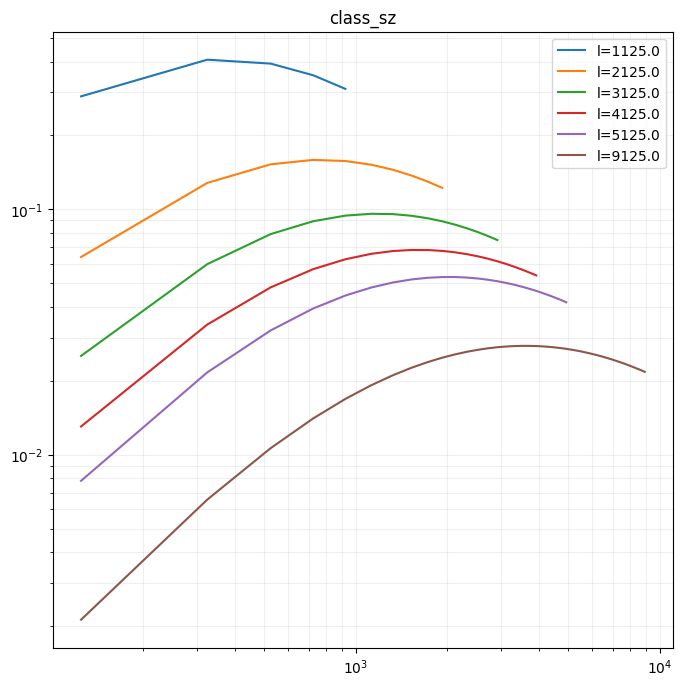

In [35]:
fig,ax = plt.subplots(figsize=(8,8))
for i in [5,10,15,20,25,45]:
    plt.plot(l[l<l[i]],Mllp[:,i][l<l[i]],label='l='+str(l[i]))

plt.loglog()
plt.grid(which = 'both',alpha=0.2)
plt.legend()
plt.title('class_sz')

In [36]:
np.shape(subset_tllp_hs),np.shape(dl_yy_1h),np.shape(l)

((49, 49), (49,), (49,))

In [37]:
lfac = np.sqrt(2.*l+1)/dl_yy_1h
lfac

array([136.3077813 ,  86.38111085,  71.36999623,  64.25301625,
        60.38137942,  58.20240255,  57.03702537,  56.53847365,
        56.5072157 ,  56.82166592,  57.40682239,  58.20626791,
        59.18199876,  60.31648186,  61.57880675,  62.95760626,
        64.44153265,  66.02826907,  67.70637405,  69.46037854,
        71.30047097,  73.22000832,  75.21060154,  77.27476301,
        79.41877953,  81.61579185,  83.8875401 ,  86.23180594,
        88.64558439,  91.12686442,  93.66407909,  96.26941205,
        98.94260237, 101.68398594, 104.4929661 , 107.36687638,
       110.29784798, 113.29584494, 116.3635278 , 119.50278211,
       122.71860994, 126.01560718, 129.34043439, 132.74550432,
       136.23768764, 139.81692281, 143.41381473, 147.10998221,
       150.91320367])

In [38]:
Mllpsims = subset_tllp_hs.values*1e24*np.outer(lfac,lfac)/8./np.pi

In [39]:
Mllpsims

array([[ 3.49549151e+00,  1.55449410e+00,  8.21644089e-01, ...,
         3.06066349e-04, -2.52272741e-03, -4.11030689e-03],
       [ 1.55449410e+00,  1.32841600e+00,  9.52351093e-01, ...,
         7.76781111e-03,  5.29291076e-03,  6.07428672e-03],
       [ 8.21644089e-01,  9.52351093e-01,  7.89124305e-01, ...,
         1.17702473e-02,  9.88020840e-03,  1.07884974e-02],
       ...,
       [ 3.06066349e-04,  7.76781111e-03,  1.17702473e-02, ...,
         2.15864242e-02,  2.16912430e-02,  2.08520845e-02],
       [-2.52272741e-03,  5.29291076e-03,  9.88020840e-03, ...,
         2.16912430e-02,  2.17961370e-02,  2.08651623e-02],
       [-4.11030689e-03,  6.07428672e-03,  1.07884974e-02, ...,
         2.08520845e-02,  2.08651623e-02,  2.01137997e-02]])

In [40]:
l

array([ 125.,  325.,  525.,  725.,  925., 1125., 1325., 1525., 1725.,
       1925., 2125., 2325., 2525., 2725., 2925., 3125., 3325., 3525.,
       3725., 3925., 4125., 4325., 4525., 4725., 4925., 5125., 5325.,
       5525., 5725., 5925., 6125., 6325., 6525., 6725., 6925., 7125.,
       7325., 7525., 7725., 7925., 8125., 8325., 8525., 8725., 8925.,
       9125., 9325., 9525., 9725.])

In [41]:
l[5],l[10],l[15]

(1125.0, 2125.0, 3125.0)

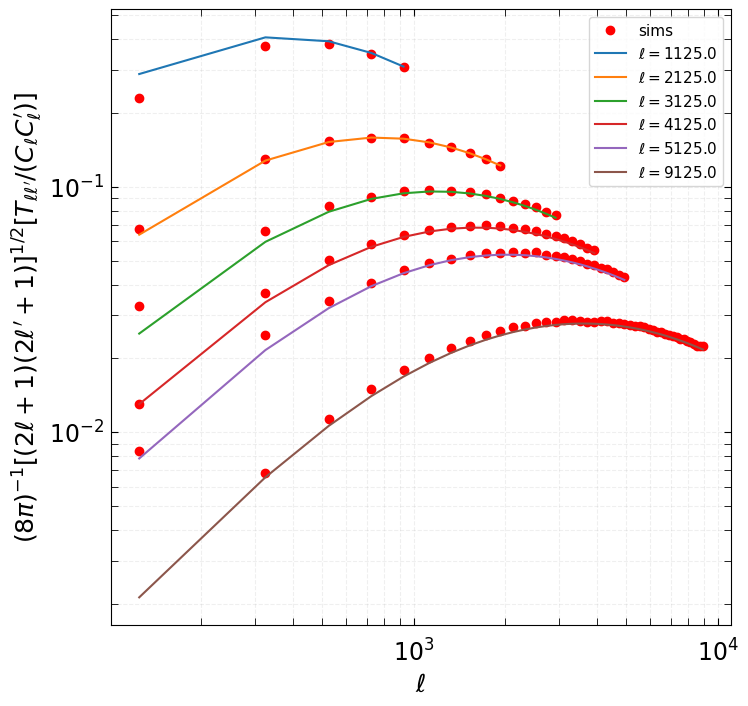

In [58]:
fig,ax = plt.subplots(figsize=(8,8))
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$(8\pi)^{-1}[(2\ell+1)(2\ell^\prime+1)]^{1/2}[T_{\ell\ell^\prime}/(C_\ell C_\ell^\prime)]$",size=title_size)
for i in [5,10,15,20,25,45]:
    
    if i == 5:
        plt.plot(l[l<l[i]],Mllpsims[:,i][l<l[i]],ls='None',marker='o',c='r',label = "sims")
    else:
        plt.plot(l[l<l[i]],Mllpsims[:,i][l<l[i]],ls='None',marker='o',c='r')
        
    plt.plot(l[l<l[i]],Mllp[:,i][l<l[i]],label='$\ell=%s$'%str(l[i]))

plt.loglog()

plt.legend(fontsize=11)
# plt.title('sims')
# plt.xlabel(r"$\ell$",size=15)